In [1]:
import pandas as pd
import joblib

In [3]:
df = pd.read_excel("data/tweet_bersih_100.xlsx")
twet = df.tweet.tolist()
label = df.label.tolist()
df.head()

,Unnamed: 0,tweet,label
0,0,buka visi misi begitu pukau sehingga buat pres...,positive
1,1,lebih baik pakai teknologi lama kaya negara in...,positive
2,2,kok arguing without menang,positive
3,3,jalan politik politik satu bukan politik pecah...,positive
4,4,juga fans lihat tampil serang hahaha,negative


negative    500
positive    500
Name: label, dtype: int64


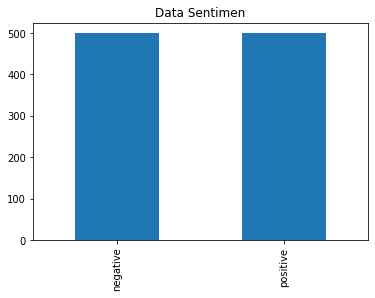

In [5]:
pd.value_counts(df['label']).plot.bar(title='Data Sentimen')
print(pd.value_counts(df['label']))

# Pembagian data & pemodelan

In [6]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import svm

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = twet
vectorizer = TfidfVectorizer()
save = vectorizer.fit(corpus)
joblib.dump(save,"model/tdidf.w")
X = vectorizer.fit_transform(corpus)

In [8]:
fitur = vectorizer.get_feature_names()
dffd = pd.DataFrame.from_dict({"kata":fitur})
dffd.to_excel("list_kata.xlsx")

In [9]:
k = 10
y = np.array(label)
kf = KFold(n_splits=k)
kf.get_n_splits(X)
# print(kf)
C_list     = np.arange(0.1, 2+0.1, 0.1)
gamma_list = np.arange(0.1, 2+0.1, 0.1)

C_list_ = list()
gamma_list_ = list()
rerata = list()
ix=1
for C in C_list:
    for gamma in gamma_list:
        C_list_.append(C)
        gamma_list_.append(gamma)
        
        clf = svm.SVC(kernel = "rbf", C = C, gamma=gamma)
        sc_10 = list()
        for train_index, test_index in kf.split(X):
        #     print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train, y_train)
    #         clf.fit(X, y)
            sc = clf.score(X_test, y_test)
            sc_10.append(sc)
            
        if ix%100==0:
            print(ix)
        else:
            print(".", end="")
        ix+=1
            
        rerata.append(sum(sc_10)/k)
dict_ = {
    "C":C_list_,
    "gamma":gamma_list_,
    "score":rerata
}
df_hasil = pd.DataFrame.from_dict(dict_)
sorted_ = df_hasil.sort_values("score", axis = 0, ascending = False)
sorted_.head(10)

...................................................................................................100
...................................................................................................200
...................................................................................................300
...................................................................................................400


,C,gamma,score
287,1.5,0.8,0.784
390,2.0,1.1,0.783
386,2.0,0.7,0.783
249,1.3,1.0,0.783
230,1.2,1.1,0.782
250,1.3,1.1,0.782
289,1.5,1.0,0.782
288,1.5,0.9,0.782
304,1.6,0.5,0.782
268,1.4,0.9,0.782


In [10]:
len(C_list_)

400

In [11]:
sorted_.gamma.tolist()[0]

0.8

In [10]:
# clf = svm.SVC(kernel = "rbf", C = 1, gamma=1)
# clf.fit(X, y)  

In [12]:
clf = clf = svm.SVC(kernel = "rbf", C = sorted_.C.tolist()[0], gamma=sorted_.gamma.tolist()[0])
save = clf.fit(X_train, y_train)
joblib.dump(save,"model/svm.m")

['model/svm.m']

In [13]:
save.score(X, y) #0.9761668321747765     0.958

0.975

In [14]:
x = save.predict(X)

In [15]:
ixx = 0
labelA = list()
labelP= list()

for i, j in zip(label, x):
    if i !=j:
        print(ixx)
        print(j)
        print("label asli",i)
        print(twet[ixx])
        print()
    ixx+=1

541
negative
label asli positive
tidak paham ekonomi investasi asing lingkup bisnis di-framing olah negara asai asing cara militan

642
positive
label asli negative
perintah dil digital layan sangat perlu

830
positive
label asli negative
pak all keluar debat malam semua umpan lawan lahap habis bahkan jawab kerap jadi serang balik

858
positive
label asli negative
apresiasi saudara 2 di papua pakde jadi percuma kalian tebar bohong papua derita

882
positive
label asli negative
lama kawan lalu musuh lama tetangga lalu tak saling bicara semua karena beda pilih

888
positive
label asli negative
rantai sahabat pak pak akan putus 2 debatpilpres 2019 dengerin tuh tkn-bpn cebong kampret

893
positive
label asli negative
jangan pilih pimpin bohong ingkar janji provokasi rakyat kacang lupa kulit pilih pimpin jujur

931
positive
label asli negative
bukan percaya mampu tni harus tni siap the worst scenario lindung indonesia prabowo

948
positive
label asli negative
kesi tuh si engkong g mau pilih